## Clustering


- Setar essa variável para `true` se for rodar no Google Colab

In [173]:
RUNNING_IN_COLAB = False

- Importa google drive, verifica GPU

In [174]:
if RUNNING_IN_COLAB:

    from google.colab import drive
    import tensorflow as tf

    #Mount drive
    drive.mount('/content/drive', force_remount=True)

    #Check GPU
    device_name = tf.test.gpu_device_name()
    if device_name != '/device:GPU:0':
        raise SystemError('GPU device not found')
    print('Found GPU at: {}'.format(device_name))

- Importar módulos

In [175]:
import sys
import pandas
import numpy as np

import matplotlib.pyplot as plt

import sklearn.cluster as cluster
import sklearn.decomposition as decomposition

- Leitura do dataset

In [176]:
if RUNNING_IN_COLAB:
    CSV_PATH = './All_Infogain.csv'
else:   
    CSV_PATH = '../../tarefa_3/dataset/FinalDataset/All_Infogain.csv'

CLASS_LABEL_COLUMN = 'class'

# Reads CSV file with data
df = pandas.read_csv(CSV_PATH, index_col=0)

#Remove valuens with 'NaN'
df.dropna(inplace=True) 

print(df)

                 pathurlRatio  ArgUrlRatio  argDomanRatio  domainUrlRatio  \
avgpathtokenlen                                                             
105.000                 0.876        0.008          0.087           0.095   
66.000                  0.874        0.009          0.091           0.096   
66.000                  0.874        0.009          0.091           0.096   
66.000                  0.874        0.009          0.091           0.096   
65.000                  0.948        0.006          0.182           0.032   
...                       ...          ...            ...             ...   
1.000                   0.098        0.049          0.067           0.732   
1.000                   0.160        0.080          0.143           0.560   
1.000                   0.098        0.049          0.067           0.732   
1.000                   0.105        0.053          0.074           0.711   
0.667                   0.125        0.050          0.071           0.700   

- Execução do Kmeans

In [177]:
print("Classes: ", df[CLASS_LABEL_COLUMN].unique())
#Counts unique class labels as clusters
n_clusters = len(df[CLASS_LABEL_COLUMN].unique())
#print(f"#### Using {n_clusters} clusters\n")

#PDA to project the data in two dimensions for the graph
df_data = df.drop(columns=[CLASS_LABEL_COLUMN])
reduced_data = decomposition.PCA(n_components=2).fit_transform(df_data)

#Kmeans
kmeans = cluster.KMeans(init="k-means++", n_clusters=n_clusters)
kmeans.fit(reduced_data)

Classes:  ['phishing' 'benign' 'Defacement' 'malware' 'spam']


KMeans(n_clusters=5)

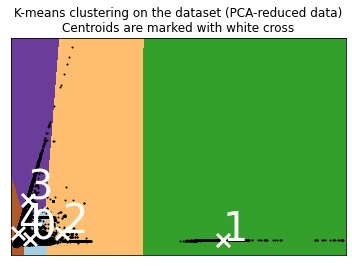

In [178]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
loc = np.arange(0,max(Z),max(Z)/float(5))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)


plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k." ,markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10
)

i = 0
for centroid in centroids:
    plt.text(centroid[0], centroid[1], f"{i}", color="w", fontsize=40)
    i +=1


plt.title(
    "K-means clustering on the dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

- How many samples are in each cluster

In [179]:
df = df.reset_index()
df['Cluster'] = kmeans.labels_

df_clusters = df[ ['class', 'Cluster'] ]
print(df_clusters)

            class  Cluster
0        phishing        3
1        phishing        3
2        phishing        3
3        phishing        3
4          benign        2
...           ...      ...
36412    phishing        4
36413  Defacement        4
36414    phishing        4
36415    phishing        4
36416    phishing        4

[36417 rows x 2 columns]
